# Second Round Data Analysis

In [344]:
import pandas as pd
import seaborn as sns
import pytz

In [345]:
df = pd.read_csv('Output/all_listening_data.csv')
pl = pd.read_csv('Output/playlist_data.csv')

## Merge Existing Datasets

In [346]:
df['id']=df['artistName']+", "+ df['trackName']
df=df.drop(columns=['Unnamed: 0'])

df.head()


,endTime,artistName,trackName,msPlayed,id
0,2020-07-11 00:19,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards"
1,2020-07-11 00:32,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards"
2,2020-07-11 03:37,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards"
3,2020-07-11 06:40,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage"
4,2020-07-11 06:42,Aru-2,Dwell,137142,"Aru-2, Dwell"


## Time Analysis

#### Listening frequency by time of day

#### Feature frequency by time of day (Excluded to songs on my playlist) 

In [347]:
#bucketing times 
times=list(df['endTime'])
hours=[]
minutes=[]
days=[]
months=[]
years=[]
for time in times:
    result=time.split('-')
    year=int(result[0])
    years.append(year)
    month=int(result[1])
    months.append(month)
    result1=result[2].split(' ')
    day=int(result1[0])
    days.append(day)
    result2=result1[1].split(':')
    hour=int(result2[0])
    hours.append(hour)
    minute=int(result2[1])
    minutes.append(minute)
    
df['TimeOfDay']=bucket
df['Year']=years
df['Month']=months
df['Day']=days
df['Hour']=hours
df['Minute']=minutes
df.head()

,endTime,artistName,trackName,msPlayed,id,TimeOfDay,Year,Month,Day,Hour,Minute
0,2020-07-11 00:19,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,11,0,19
1,2020-07-11 00:32,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,11,0,32
2,2020-07-11 03:37,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards",evening,2020,7,11,3,37
3,2020-07-11 06:40,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage",evening,2020,7,11,6,40
4,2020-07-11 06:42,Aru-2,Dwell,137142,"Aru-2, Dwell",evening,2020,7,11,6,42


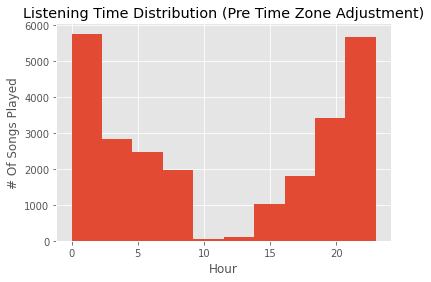

In [348]:
%matplotlib inline
plt.style.use('ggplot')


x_pos = [i for i, _ in enumerate(x)]

plt.hist(df['Hour'])
plt.xlabel("Hour")
plt.ylabel("# Of Songs Played")
plt.title("Listening Time Distribution (Pre Time Zone Adjustment)")

plt.show()

### Adjusting for time zones

Ok so we're not told which timezone this is recorded in.  My guess is that for standardization they're using GMT 0. I'm making this guess based on the visual data showing me that my least frequent listening period is around the afternoon which is counter-intuititve to what I know I do. Based on this, I am going to adjust all times where I was roughly in California by 8 hours (the time difference between GMT and PST) and all the dates where I was in Michigan by 5 hours (also the time difference).  Because I don't know the to the minute dates, I'm going to roughly estimate dates 

Know we know the frame of time this was collecetd in, we can go back and find the rough estimates for my time in Michigan.

PCT: 2020-07-11

EST: 2020-08-06

PCT: 2020-11-23

EST: 2020-12-30

PCT: 2021-01-31

So i'll have to adjust PT to -8, and EST to -5 

In [349]:
df['endTime']=pd.to_datetime(df['endTime'])

def localize (x):
    local_tz = pytz.timezone('UTC') # setting time zone ot UTC 
    return(local_tz.localize(x))

df['endTime']= df['endTime'].apply(lambda x: localize(x))


end=len(df)-1
#print("The start date of this data set is: " + df['endTime'][0])
#print("The end date of this data set is: " + df['endTime'][end])


#changing timezones according to when I am where
PST = pytz.timezone('America/Los_Angeles')
EST= pytz.timezone('America/Detroit')
def change_timezone(x):
    if x >pd.to_datetime('2020-09-06 00:00:00+0000') and x < pd.to_datetime('2020-11-23 00:00:00+0000') or x> pd.to_datetime('2020-12-30 00:00:00+0000')   and x< pd.to_datetime('2021-01-31 00:00:00+0000'):
        return EST.normalize(x)
    else:
        return PST.normalize(x)

df['endTime']=df['endTime'].apply(lambda x: change_timezone(x))
df.head()


,endTime,artistName,trackName,msPlayed,id,TimeOfDay,Year,Month,Day,Hour,Minute
0,2020-07-10 17:19:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,11,0,19
1,2020-07-10 17:32:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,11,0,32
2,2020-07-10 20:37:00-07:00,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards",evening,2020,7,11,3,37
3,2020-07-10 23:40:00-07:00,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage",evening,2020,7,11,6,40
4,2020-07-10 23:42:00-07:00,Aru-2,Dwell,137142,"Aru-2, Dwell",evening,2020,7,11,6,42


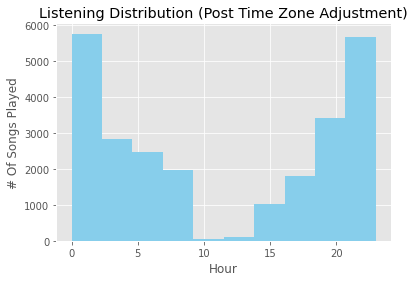

In [351]:
%matplotlib inline
plt.style.use('ggplot')


x_pos = [i for i, _ in enumerate(x)]

plt.hist(df['Hour'], color='skyblue')
plt.xlabel("Hour")
plt.ylabel("# Of Songs Played")
plt.title("Listening Distribution (Post Time Zone Adjustment)")

plt.show()

In [361]:
#Getting day of week
df['weekday']=df['endTime'].apply(lambda x: x.weekday())

In [362]:
#bucketing times 
times=list(df['endTime'])    
hours=[]
minutes=[]
days=[]
months=[]
years=[]
for time in times:
    time=str(time)
    result=time.split('-')
    year=int(result[0])
    years.append(year)
    month=int(result[1])
    months.append(month)
    result1=result[2].split(' ')
    day=int(result1[0])
    days.append(day)
    result2=result1[1].split(':')
    hour=int(result2[0])
    hours.append(hour)
    minute=int(result2[1])
    minutes.append(minute)
    
df['TimeOfDay']=bucket
df['Year']=years
df['Month']=months
df['Day']=days
df['Hour']=hours
df['Minute']=minutes
df.head()

,endTime,artistName,trackName,msPlayed,id,TimeOfDay,Year,Month,Day,Hour,Minute,norm,lognorm,weekday
0,2020-07-10 17:19:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,19,89907.0,11.406531,4
1,2020-07-10 17:32:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,32,89907.0,11.406531,4
2,2020-07-10 20:37:00-07:00,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards",evening,2020,7,10,20,37,56982.0,10.950491,4
3,2020-07-10 23:40:00-07:00,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage",evening,2020,7,10,23,40,57141.5,10.953286,4
4,2020-07-10 23:42:00-07:00,Aru-2,Dwell,137142,"Aru-2, Dwell",evening,2020,7,10,23,42,68571.5,11.135632,4


### Bucketing Times 

How times are bucketed:

**morning:** 5  - 12

**afternoon:** 12 - 17

**evening:** 17 - 23

**late night:** 23 - 5

In [353]:
bucket=[]
for hour in hours:
    if hour > 5 and hour <12:
            bucket.append('morning')
    elif hour >=12 and hour < 18:
        bucket.append('afternoon')
    elif hour >=18 and hour <24:
        bucket.append('evening')
    elif hour >=24 or hour <=5:
        bucket.append('late_night')
    else:
        bucket.append(hour)
df['TimeOfDay']=bucket

In [354]:
df.head()

,endTime,artistName,trackName,msPlayed,id,TimeOfDay,Year,Month,Day,Hour,Minute
0,2020-07-10 17:19:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,19
1,2020-07-10 17:32:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,32
2,2020-07-10 20:37:00-07:00,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards",evening,2020,7,10,20,37
3,2020-07-10 23:40:00-07:00,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage",evening,2020,7,10,23,40
4,2020-07-10 23:42:00-07:00,Aru-2,Dwell,137142,"Aru-2, Dwell",evening,2020,7,10,23,42


####  Favorite songs for each time of morning (bucketing times)


In [355]:
pf=df.copy()
pf=pf.groupby(['TimeOfDay']).sum() #summing by that unique id (so get total listen time on each song)
pf['msPlayed'].head()

#You cant get the average by doing .mean because it'll divide by number of instances of late night, etc. THat would just be looking 
#at how long I listen to an instance of a song on average in each bucket


TimeOfDay
afternoon     1453279502
evening       1234790558
late_night     304723790
morning        308349440
Name: msPlayed, dtype: int64

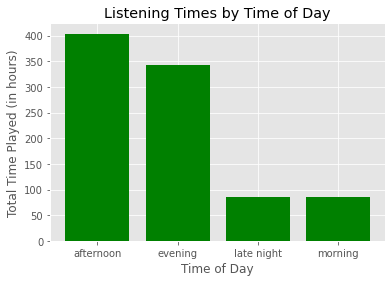

In [356]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

x_ = ['afternoon (12pm-5pm)', 'evening (6pm-11pm)', 'late night (12am-4am)', 'morning (6am-10am)']
x = ['afternoon', 'evening', 'late night', 'morning']
hrs = list(pf['msPlayed']/1000/60/60)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, hrs, color='green')
plt.xlabel("Time of Day")
plt.ylabel("Total Time Played (in hours)")
plt.title("Listening Times by Time of Day")

plt.xticks(x_pos, x)

plt.show()


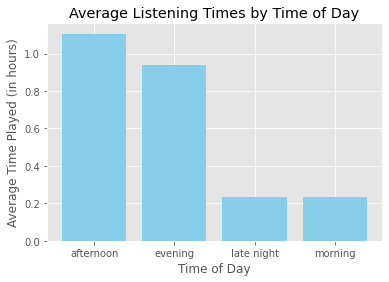

In [370]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

x_ = ['afternoon (12pm-5pm)', 'evening (6pm-11pm)', 'late night (12am-4am)', 'morning (6am-10am)']
x = ['afternoon', 'evening', 'late night', 'morning']
hrs = list(pf['msPlayed']/1000/60/60/365) #divide by 365 to get average (since 365 days of data collected)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, hrs, color='skyblue')
plt.xlabel("Time of Day")
plt.ylabel("Average Time Played (in hours)")
plt.title("Average Listening Times by Time of Day")

plt.xticks(x_pos, x)

plt.show()


All time buckets are 6 hour stints. Which means they're equal slices into my listening habits. From this basically, i really listen to music mostly in the evening and morning which makes much sense, since I often am not awake until 10am because of later classes.


What is a little astounding is just how much music i'm listening to... nearly an hour in the afternoon and evening, and about half an hour in the late night and morning combined each day. 

array([[<AxesSubplot:title={'center':'afternoon'}>,
        <AxesSubplot:title={'center':'evening'}>],
       [<AxesSubplot:title={'center':'late_night'}>,
        <AxesSubplot:title={'center':'morning'}>]], dtype=object)

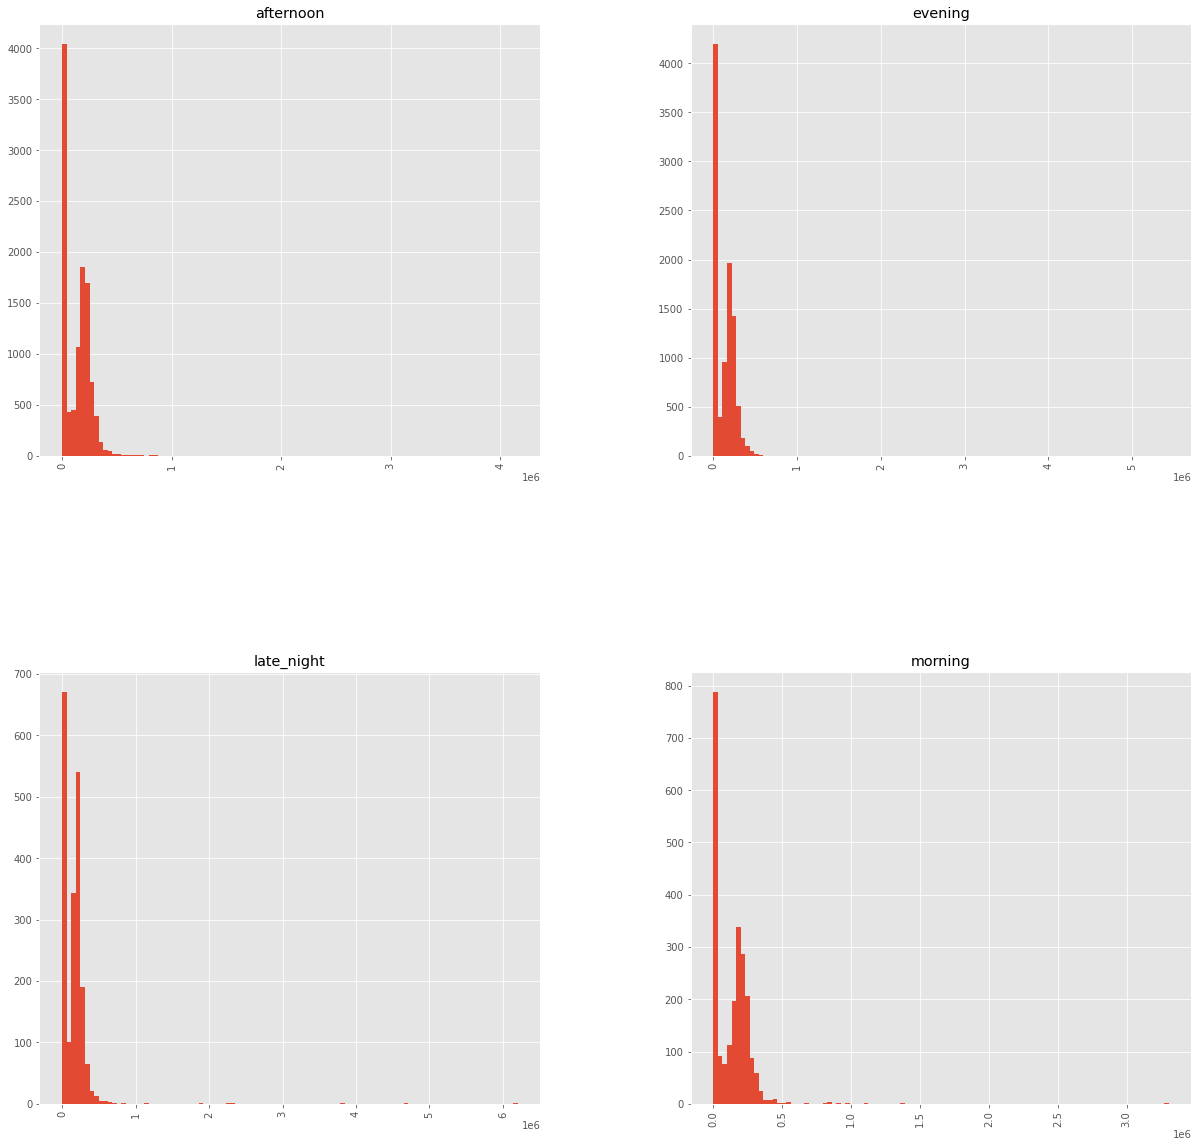

In [358]:
#df['msPlayed'].hist(by=df['TimeOfDay'], figsize = [20,20], grid= True)
import numpy as np
df['norm'] = (1+df['msPlayed'])/2
df['lognorm'] = np.log(df['norm'])
df['msPlayed'].hist(by=df['TimeOfDay'], figsize = [20,20], grid= True, bins=100)

my guess is that if we get rid of all the songs played for less than 15 seconds, that we'll get what looks like a normal distribution

<ipython-input-359-75e28015592a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf['norm'] = (1+rf['msPlayed'])/2
<ipython-input-359-75e28015592a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf['lognorm'] = np.log(rf['norm'])


array([[<AxesSubplot:title={'center':'afternoon'}>,
        <AxesSubplot:title={'center':'evening'}>],
       [<AxesSubplot:title={'center':'late_night'}>,
        <AxesSubplot:title={'center':'morning'}>]], dtype=object)

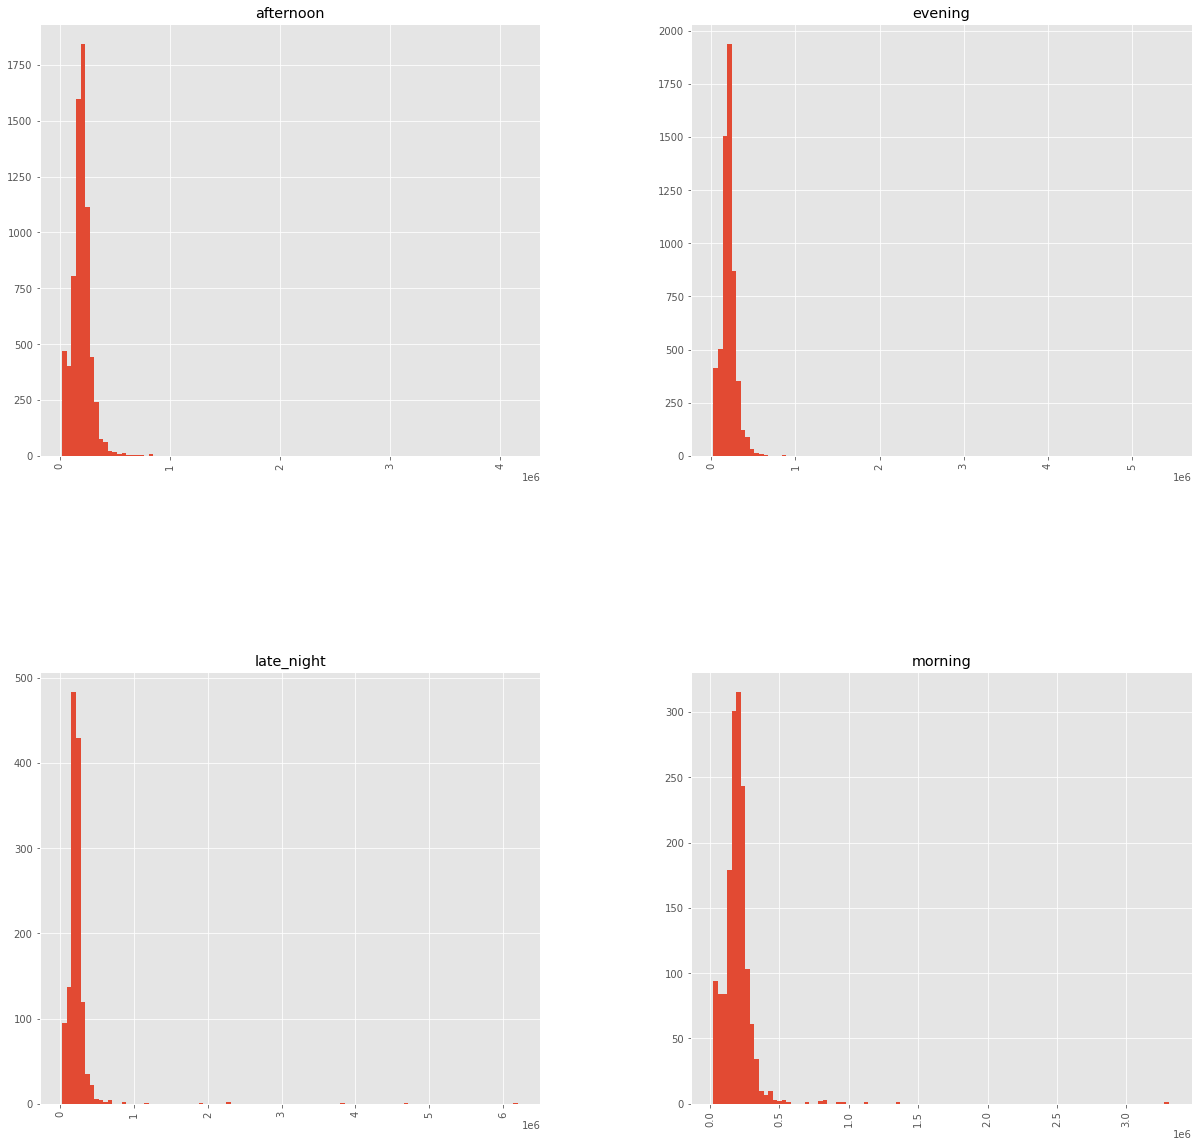

In [359]:
#df['msPlayed'].hist(by=df['TimeOfDay'], figsize = [20,20], grid= True)
import numpy as np
rf=df[df['msPlayed']>25000]
rf['norm'] = (1+rf['msPlayed'])/2
rf['lognorm'] = np.log(rf['norm'])
rf['msPlayed'].hist(by=rf['TimeOfDay'], figsize = [20,20], grid= True, bins=100)

Ok so from this we can really just see that I skip songs at all times of the day-lol. Basically the 0's are just times in which I listened to maybe the first four chords then skipped. 

The data definitely looks more normal now, but the main exception are songs with very little playtime, which just means that I skip a lot of songs/ am very picky about my music which is kind of interesting. IT looks like that cutoff is somewhere around the 20 second mark but I'll do more exploring below

**Insight:** I am very picky when it comes to music and skip songs a lot.

array([[<AxesSubplot:title={'center':'afternoon'}>,
        <AxesSubplot:title={'center':'evening'}>],
       [<AxesSubplot:title={'center':'late_night'}>,
        <AxesSubplot:title={'center':'morning'}>]], dtype=object)

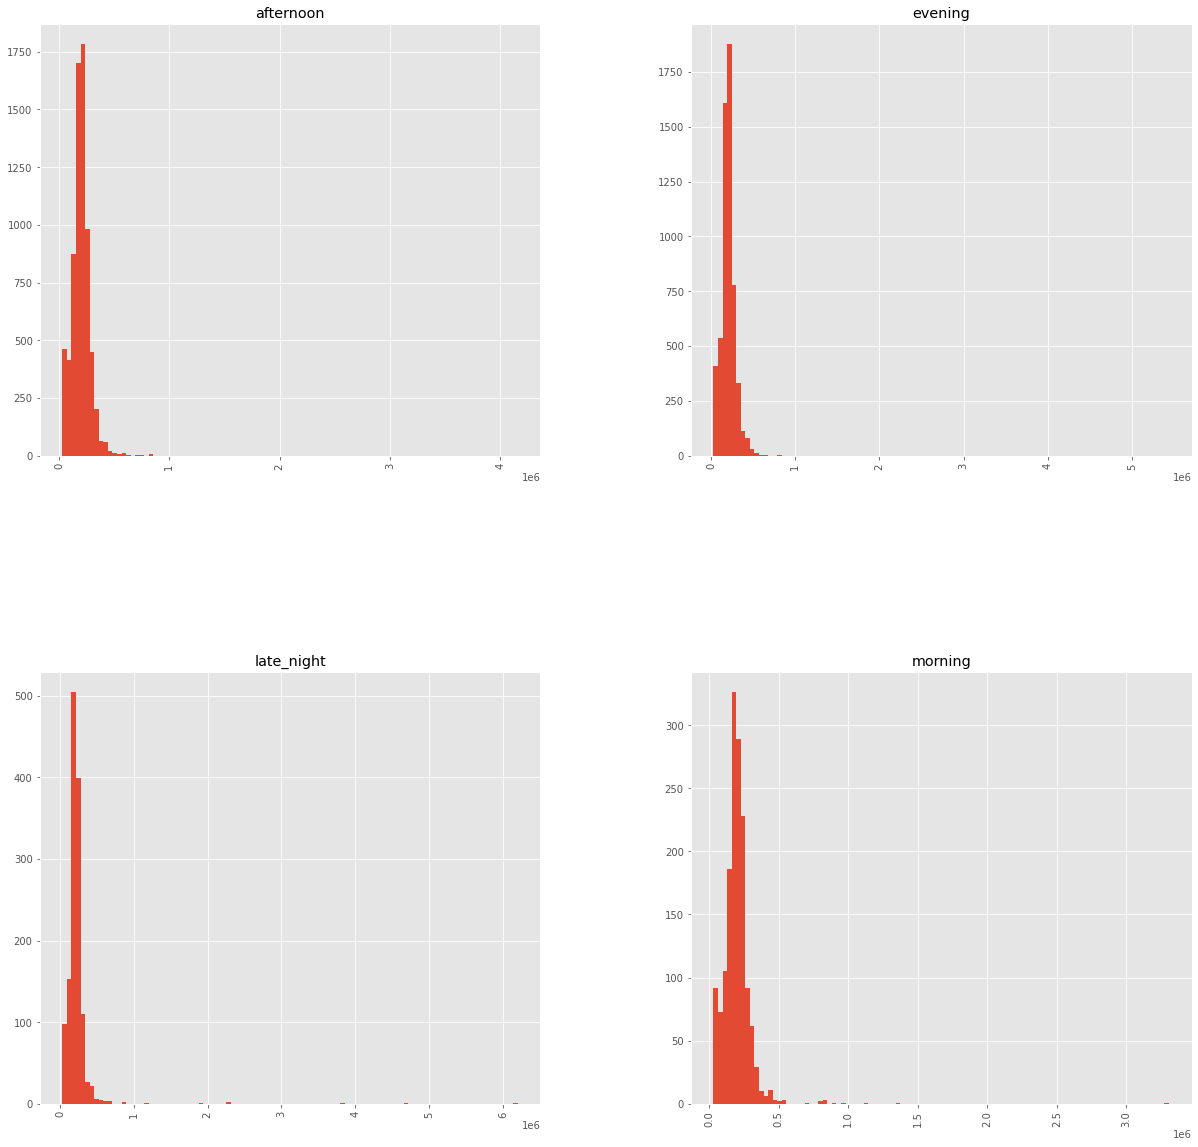

In [280]:
rf=df[df['msPlayed']>30000]
rf['msPlayed'].hist(by=rf['TimeOfDay'], figsize = [20,20], grid= True, bins=100)
plt.hist(x_pos, energy, color='green')


Find a way of hooking up the date to the day of the week to get day of the week insights- that'd be dope

In [366]:
day_of_week=df.copy()
day_of_week=day_of_week.groupby(['weekday']).sum() #summing by that unique id (so get total listen time on each song)
day_of_week['msPlayed'].head()

weekday
0    492520159
1    494507107
2    501969974
3    413161866
4    507624383
Name: msPlayed, dtype: int64

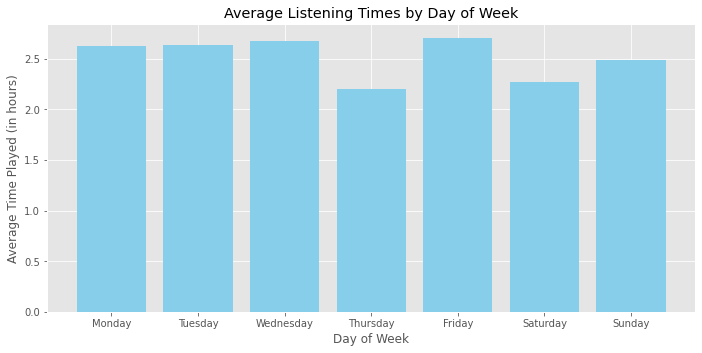

In [373]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

x = [ 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
hrs = list(day_of_week['msPlayed']/1000/60/60/52) #divide by 52 to get average bc that's num instances of each day in yr (appx)

x_pos = [i for i, _ in enumerate(x)]
plt.axes([0, 0.6, 1.5, 1])

plt.bar(x_pos, hrs, color='skyblue')
plt.xlabel("Day of Week")
plt.ylabel("Average Time Played (in hours)")
plt.title("Average Listening Times by Day of Week")

plt.xticks(x_pos, x)

plt.show()


Honestly this is substantially stranger than I expected.  I really thought you'd see more of a pattern. I have 0 clue why thursday is slightly less listening time. You could say saturday has less listening time because I'm theoretically out doing more things with friends on saturdays (as opposed to work which is where I like to listen to a lot of music)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

x = [ 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
hrs = list(day_of_week['msPlayed']/1000/60/60/52) #divide by 52 to get average bc that's num instances of each day in yr (appx)

x_pos = [i for i, _ in enumerate(x)]
plt.axes([0, 0.6, 1.5, 1])

plt.bar(x_pos, hrs, color='skyblue')
plt.xlabel("Day of Week")
plt.ylabel("Average Time Played (in hours)")
plt.title("Average Listening Times by Day of Week")

plt.xticks(x_pos, x)

plt.show()


### Creating Dataset by All Listening Instances

In [386]:
def weekday_name(x):
    if x==0:
        name="Monday"
    elif x==1:
        name='Tuesday'
    elif x==2:
        name='Wednesday'
    elif x==3:
        name='Thurday'
    elif x==4:
        name='Friday'
    elif x==5:
        name='Saturday'
    elif x==6:
        name='Sunday'
    return name


In [387]:
df['weekday']=df['weekday'].apply(lambda x: weekday_name(x))
df.head()

,endTime,artistName,trackName,msPlayed,id,TimeOfDay,Year,Month,Day,Hour,Minute,norm,lognorm,weekday
0,2020-07-10 17:19:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,19,89907.0,11.406531,Friday
1,2020-07-10 17:32:00-07:00,Russian Cursive,Backwards,179813,"Russian Cursive, Backwards",afternoon,2020,7,10,17,32,89907.0,11.406531,Friday
2,2020-07-10 20:37:00-07:00,Russian Cursive,Backwards,113963,"Russian Cursive, Backwards",evening,2020,7,10,20,37,56982.0,10.950491,Friday
3,2020-07-10 23:40:00-07:00,Toro y Moi,Mirage,114282,"Toro y Moi, Mirage",evening,2020,7,10,23,40,57141.5,10.953286,Friday
4,2020-07-10 23:42:00-07:00,Aru-2,Dwell,137142,"Aru-2, Dwell",evening,2020,7,10,23,42,68571.5,11.135632,Friday


In [380]:
pl['id']=pl['artist'] + ', '+ pl['song']
pl.head(1)

,Unnamed: 0,song,album,artist,uri,instances,playlists,acousticness,danceability,energy,key,loudness,mode,speechiness,tempo,valence,id
0,0,Navajo,Navajo,Masego,6zWU7YALeEDMcPGhKKZJhV,4,"['Iykyk', 'These have no common theme other th...",0.117,0.567,0.593,6,-7.404,0,0.288,88.545,0.358,"Masego, Navajo"


In [388]:
new_data = pd.merge(pl,df, on="id")  #you lose 63% of data with this merge
new_data.to_csv('Merged_PL_and_Listening_Data.csv')


### Creating Dataset By Total Listening Time

In [294]:
df_a=df.groupby(['id']).sum() #summing by that unique id (so get total listen time on each song)
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4762 entries, ((( O ))), Omw to 武, 生きる
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   msPlayed  4762 non-null   int64
dtypes: int64(1)
memory usage: 74.4+ KB


In [295]:
pl=pl.drop(columns=['Unnamed: 0'])
pl['id']=pl['artist']+", "+pl['song']
pl.head(2) 

,song,album,artist,uri,instances,playlists,acousticness,danceability,energy,key,loudness,mode,speechiness,tempo,valence,id
0,Navajo,Navajo,Masego,6zWU7YALeEDMcPGhKKZJhV,4,"['Iykyk', 'These have no common theme other th...",0.1170,0.567,0.593,6,-7.404,0,0.2880,88.545,0.358,"Masego, Navajo"
1,Wasn't Looking,A Real Romantic,ELIZA,7kw7eF5H8qLQU0IxbT2gq6,3,"['Iykyk', 'These have no common theme other th...",0.0858,0.845,0.176,5,-9.973,0,0.0598,82.004,0.587,"ELIZA, Wasn't Looking"


In [296]:
all_data = pd.merge(pl,df_a, on="id")  #you lose 42 rows/songs when you do this merge. 
#Could be because of lack of data (didn't listen to it recetnly so not on recently listened), or because of bad data

In [297]:
#all_data.head()

### Relationships between features and listening

In [33]:
#sns.pairplot(all_data,x_vars= ['instances', 'msPlayed','acousticness', 'danceability', 'energy', 'key','loudness','mode','speechiness','tempo','valence'], 
#                 y_vars= ['instances', 'msPlayed','acousticness', 'danceability', 'energy', 'key','loudness','mode','speechiness','tempo','valence'])

In [35]:
#sns.pairplot(all_data,x_vars= ['instances', 'msPlayed'], 
#           y_vars= ['acousticness', 'danceability', 'energy', 'key','loudness','mode','speechiness','tempo','valence'])

**Insight**: There's really nothing interesting- Listening, the way most viewing goes (similar to youtube watching), follows an logarithmic function **(Check that)**, which when logged, goes back to a normal distribution 

# Graveyard


In [267]:
a = df['Hour'][df['TimeOfDay']=='afternoon'].unique()
e= df['Hour'][df['TimeOfDay']=='evening'].unique()
l= df['Hour'][df['TimeOfDay']=='late_night'].unique()
m= df['Hour'][df['TimeOfDay']=='morning'].unique()
print(a)
print(e)
print(l)
print(m)

[17 12 13 15 14 16]
[20 23 18 19 22 21]
[0 1 2 5 3 4]
[10 11  8  9  7  6]


## Trying to do some weird animation shit

In [114]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = 

# histogram our data with numpy
data = df['msPlayed']
n, _ = np.histogram(data, HIST_BINS)

In [ ]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [ ]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()